# Diving into KNN modeling

In [1]:
# Import modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.neighbors import KNeighborsClassifier

# Set aesthetics
%matplotlib inline
sns.set_style('white')
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [2]:
# Load dataset.

df = sns.load_dataset("iris")
print(df.shape)
print(df.dtypes)
df.head()

(150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
# Creating target

df['target_cat'] = df['species'].apply(lambda x: 0 if x == 'setosa'
                                       else (1 if x == 'versicolor' else 2))

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,target_cat
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


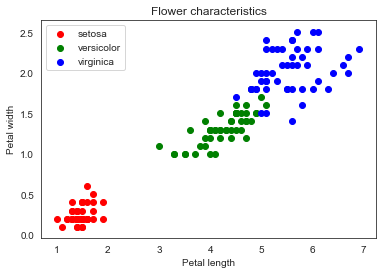

In [5]:
# Visualizing our dataset.

plt.scatter(df[df['target_cat'] == 0].petal_length,
            df[df['target_cat'] == 0].petal_width,
            color='red')

plt.scatter(df[df['target_cat'] == 1].petal_length,
            df[df['target_cat'] == 1].petal_width,
            color='green')

plt.scatter(df[df['target_cat'] == 2].petal_length,
            df[df['target_cat'] == 2].petal_width,
            color='blue')

plt.legend(['setosa', 'versicolor', 'virginica'])
plt.title('Flower characteristics')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [6]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = df.loc[:, 'petal_length':'petal_width']
Y = df.loc[:, 'target_cat']
neighbors.fit(X, Y)

# Predict for a flower with 5 petal length and 1.6 petal width.
print(neighbors.predict([[5, 1.6]]))
print(neighbors.predict_proba([[5, 1.6]]))

[1]
[[0.  0.8 0.2]]


In [7]:
# Converting dataframe to array for mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 50

In [8]:
# Plot the decision boundary. Assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, h), np.linspace(y_min, y_max, h))
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

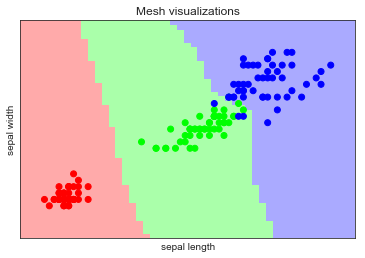

In [9]:
# Put the results into a color plot. 
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Add the training points to the plot.
plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap_bold)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Mesh visualizations')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

# Brute-force Nearest Neighbors Algorithm
<br>
Code a nearest neighbor algorithm that works for 2-dimensional data. Test it against SKLearn package on music dataset to ensure accuracy. 

### Manually generated music dataset:

[1]
[[0.4 0.6]]


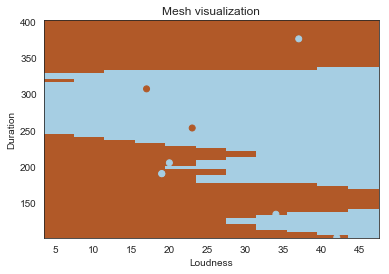

In [11]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

#music.head()

from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### Attempting KNN

In [13]:
df_test = pd.DataFrame()
df_test['duration'] = [11, 10, 5, 4]
df_test['loudness'] = [9, 8, 2, 1]
df_test['jazz'] = [0, 0, 1, 1]
df_test.head()

,duration,loudness,jazz
0,11,9,0
1,10,8,0
2,5,2,1
3,4,1,1


In [15]:
# euclidean distance by hand
(((11-9) ** 2) + ((10-8) ** 2) + ((5-2) ** 2) + ((4-1) ** 2)) ** 0.5

5.0990195135927845

In [ ]:
# Brute force KNN algorithm.

def knn(k, data, jazz, input):
    

In [12]:
# input = []
# K_number_of_neighbors = 5
# define how euclidean distance is measured
# write a loop that takes euclidean distance between input and datapoints and append
#               --> call this " input_point_distance ""
# sort the input_point_distance by ascending (min is first)
# each of the K_number_of_neighbors (ie: top 5 neighbors) get a vote .. call this getVotes
#               --> getVotes will append to decisionVotes = []
# decisionVotes[response] += 1 else: decisionVotes[response] = 1
# sort decisionVotes and return the neighbor w/ most votes ... return sortedDecisionVotes[0][0]
  
    
#X.iloc[:, 0] #duration as series
#X.iloc[:, 1] #loudness as series

# Writing a for loop subtracting duration from loudness 
# and appending to a new column .. ie: 184-18 = 166.

#def subtractFunc(col_A, col_B):
#    return col_A - col_B

#df_test['col_C'] = subtractFunc(df_test['col_A'], df_test['col_B'])

#df_test['col_C'] = df_test.apply(lambda row: subtractFunc(row['col_A'], row['col_B']), axis=1)

#df_test['col_C'] = df_test['col_A'] - df_test['col_B']




#def knn():
    # Input the datapoints for testing and decide on number of k-nearest neighbors. 
#    predict_input_x = 24
#    predict_input_y = 190
#    k = 5
    # Adding a column containing euclidean distances
#    music['eDistance'] = None
    # Create loop for each row i iterating over columns j
#    for i in X:
#        multiplied_values = 0
#        for j in X.columns:
#            music['eDistance'] += ((i - predict_input_x) ** 2 + (i - predict_input_y) ** 2) ** 0.5

# CODE (cont.)

    # Define how to calculate euclidean distance. This is the distance between input and all other datapoints.
#    def euclideanDistance():
#        return 
    
#    print('predicted type is: ', )
    
# .iloc[:,0:2]
# dfc['A'][0] = 111 would set col A row 0 value to 111

#df_test.loc[0][0] - df_test.loc[0][1]

#X = music[['duration', 'loudness']] #X as DataFrame
#Y = music.jazz #Y as series
#X.iloc[:, 0] #duration as series
#X.iloc[:, 1] #loudness as series
#music.head()